In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("housing.csv")

# Select relevant columns
df = data

# Check for missing values
print(df.isnull().sum())

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64


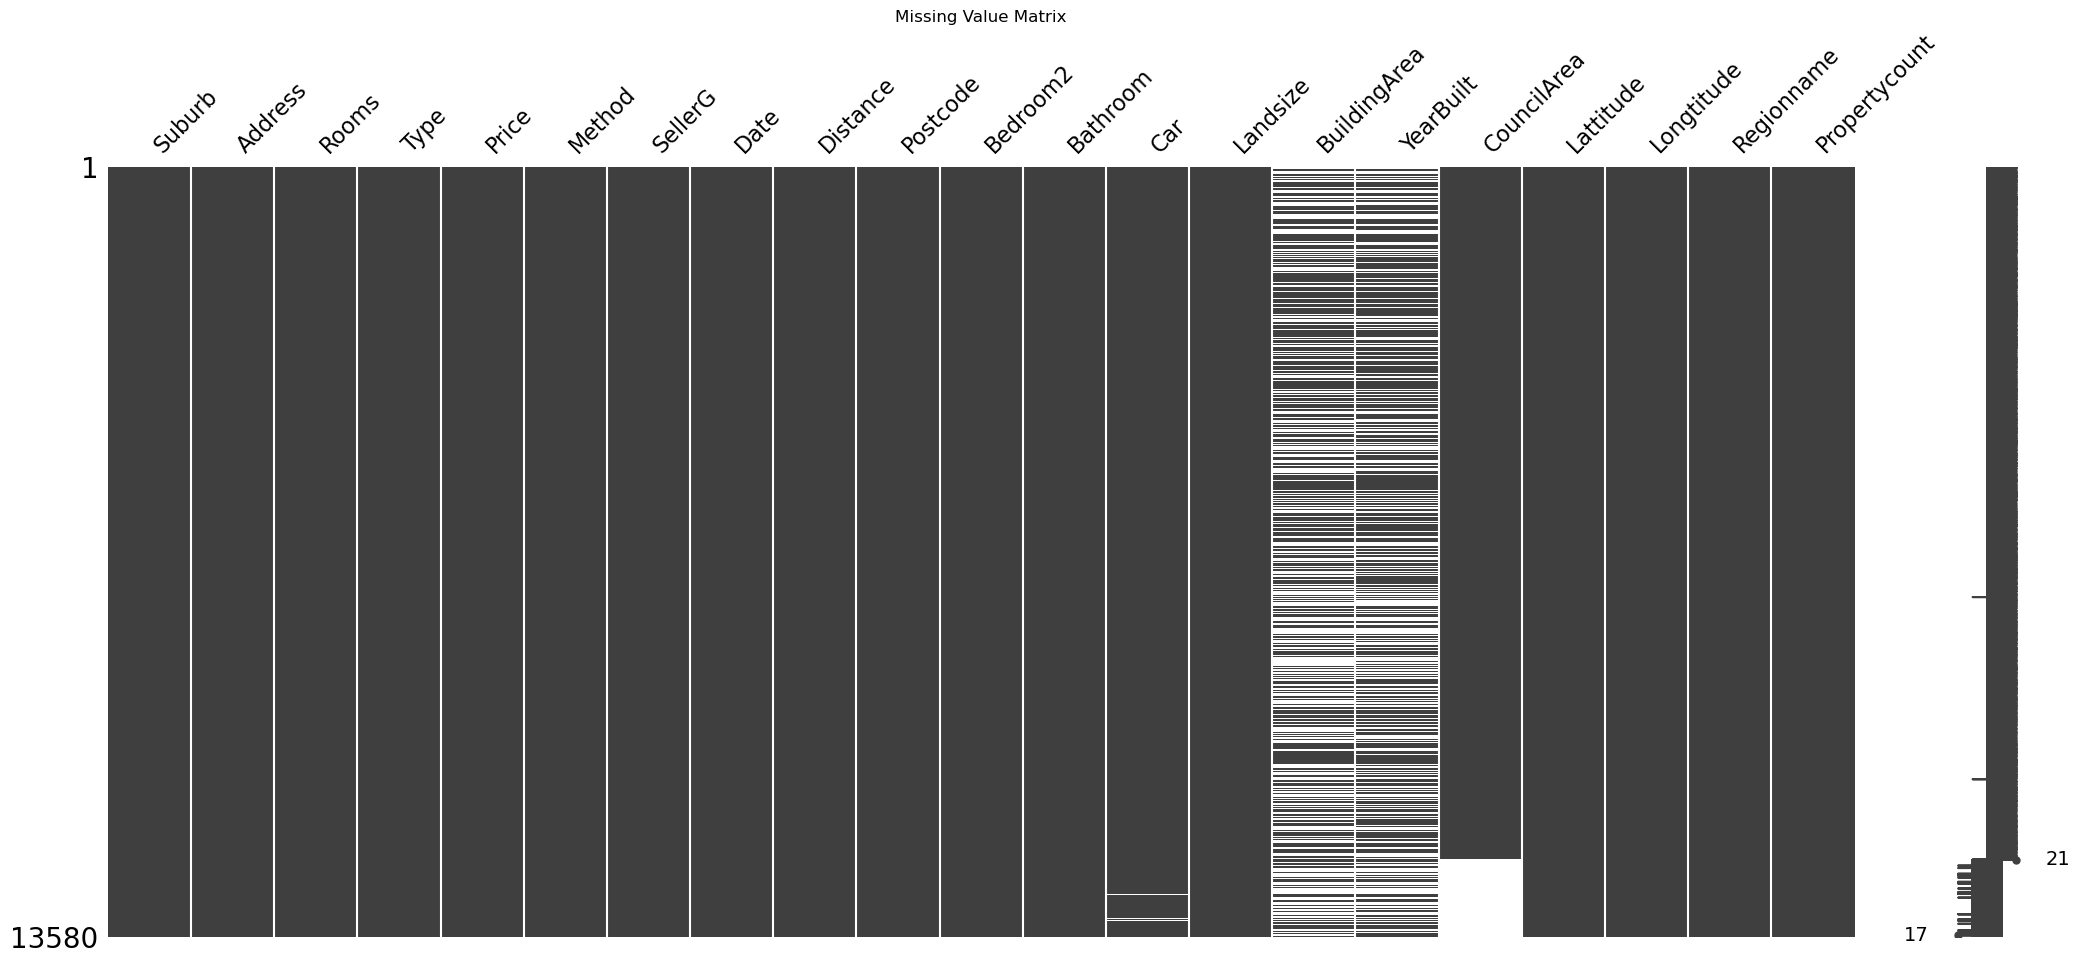

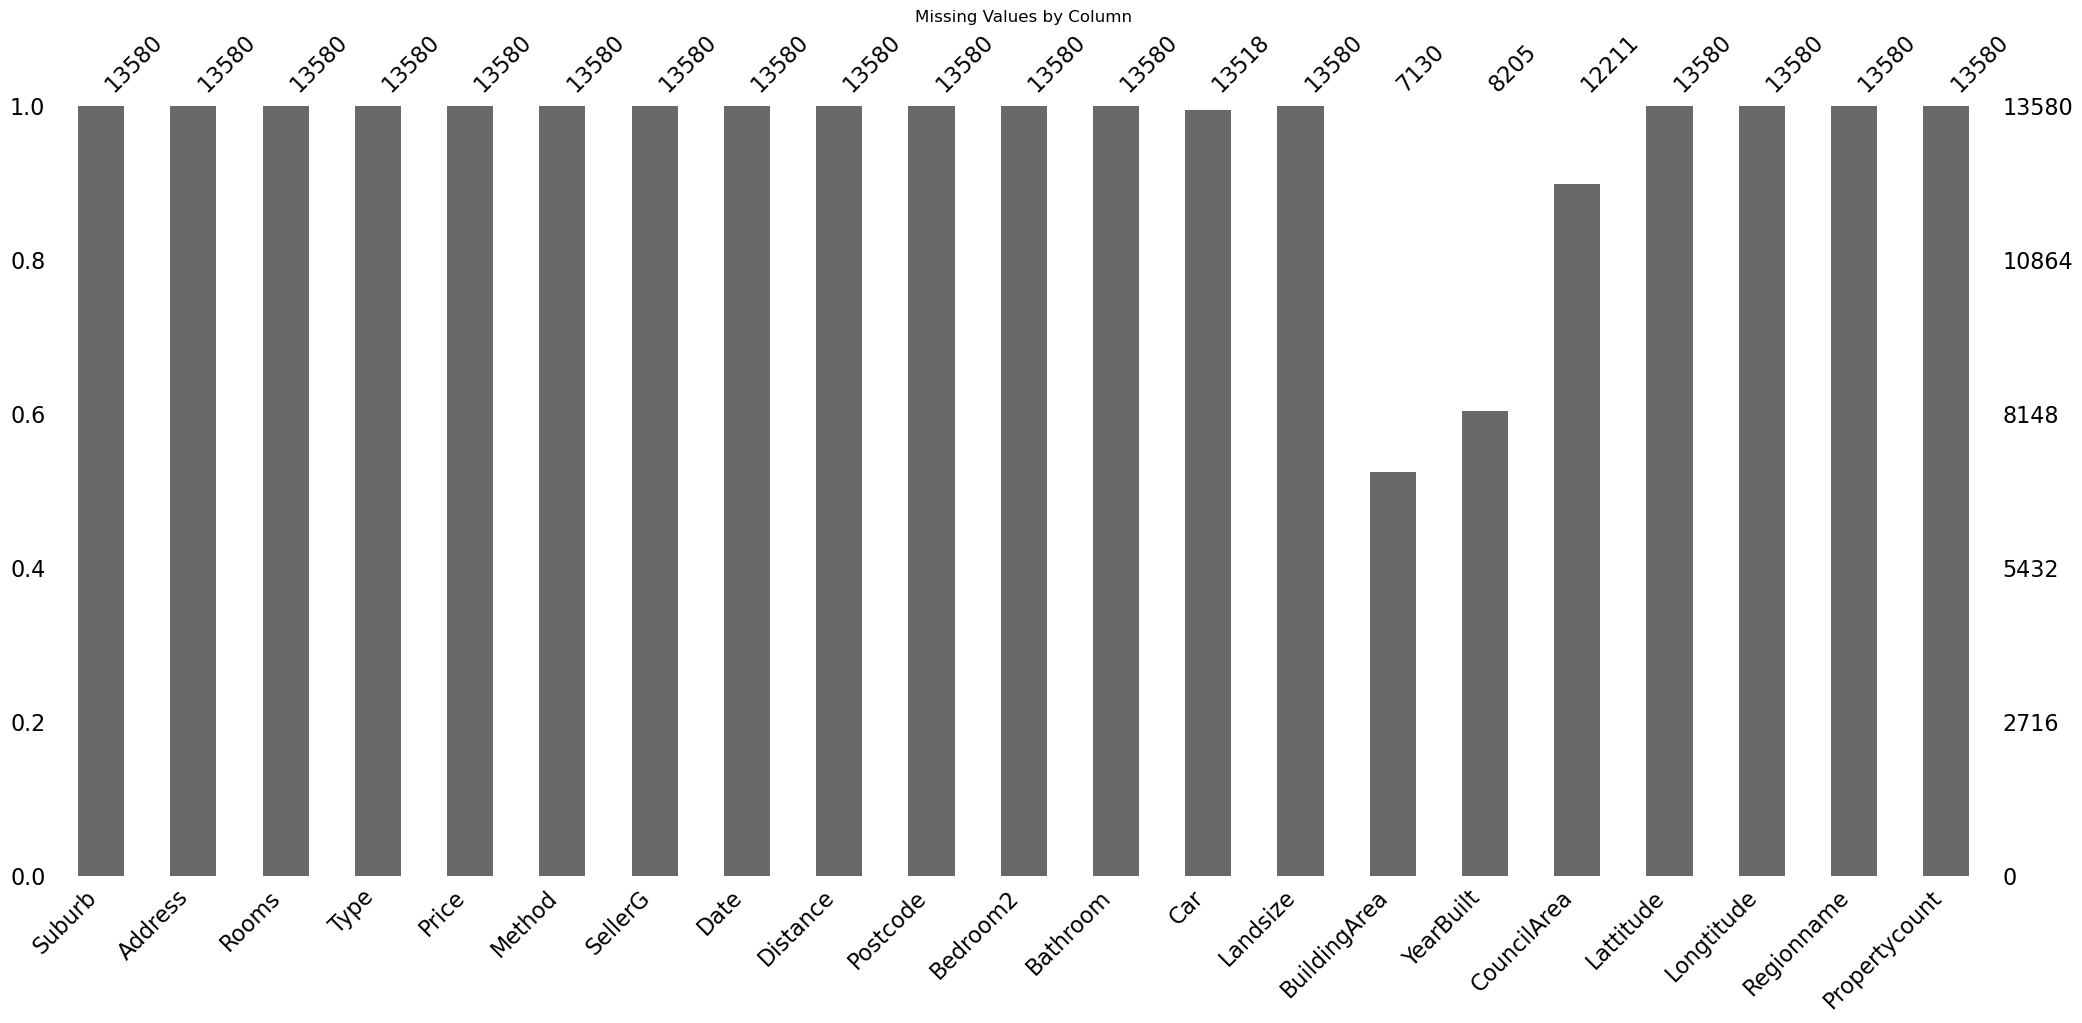

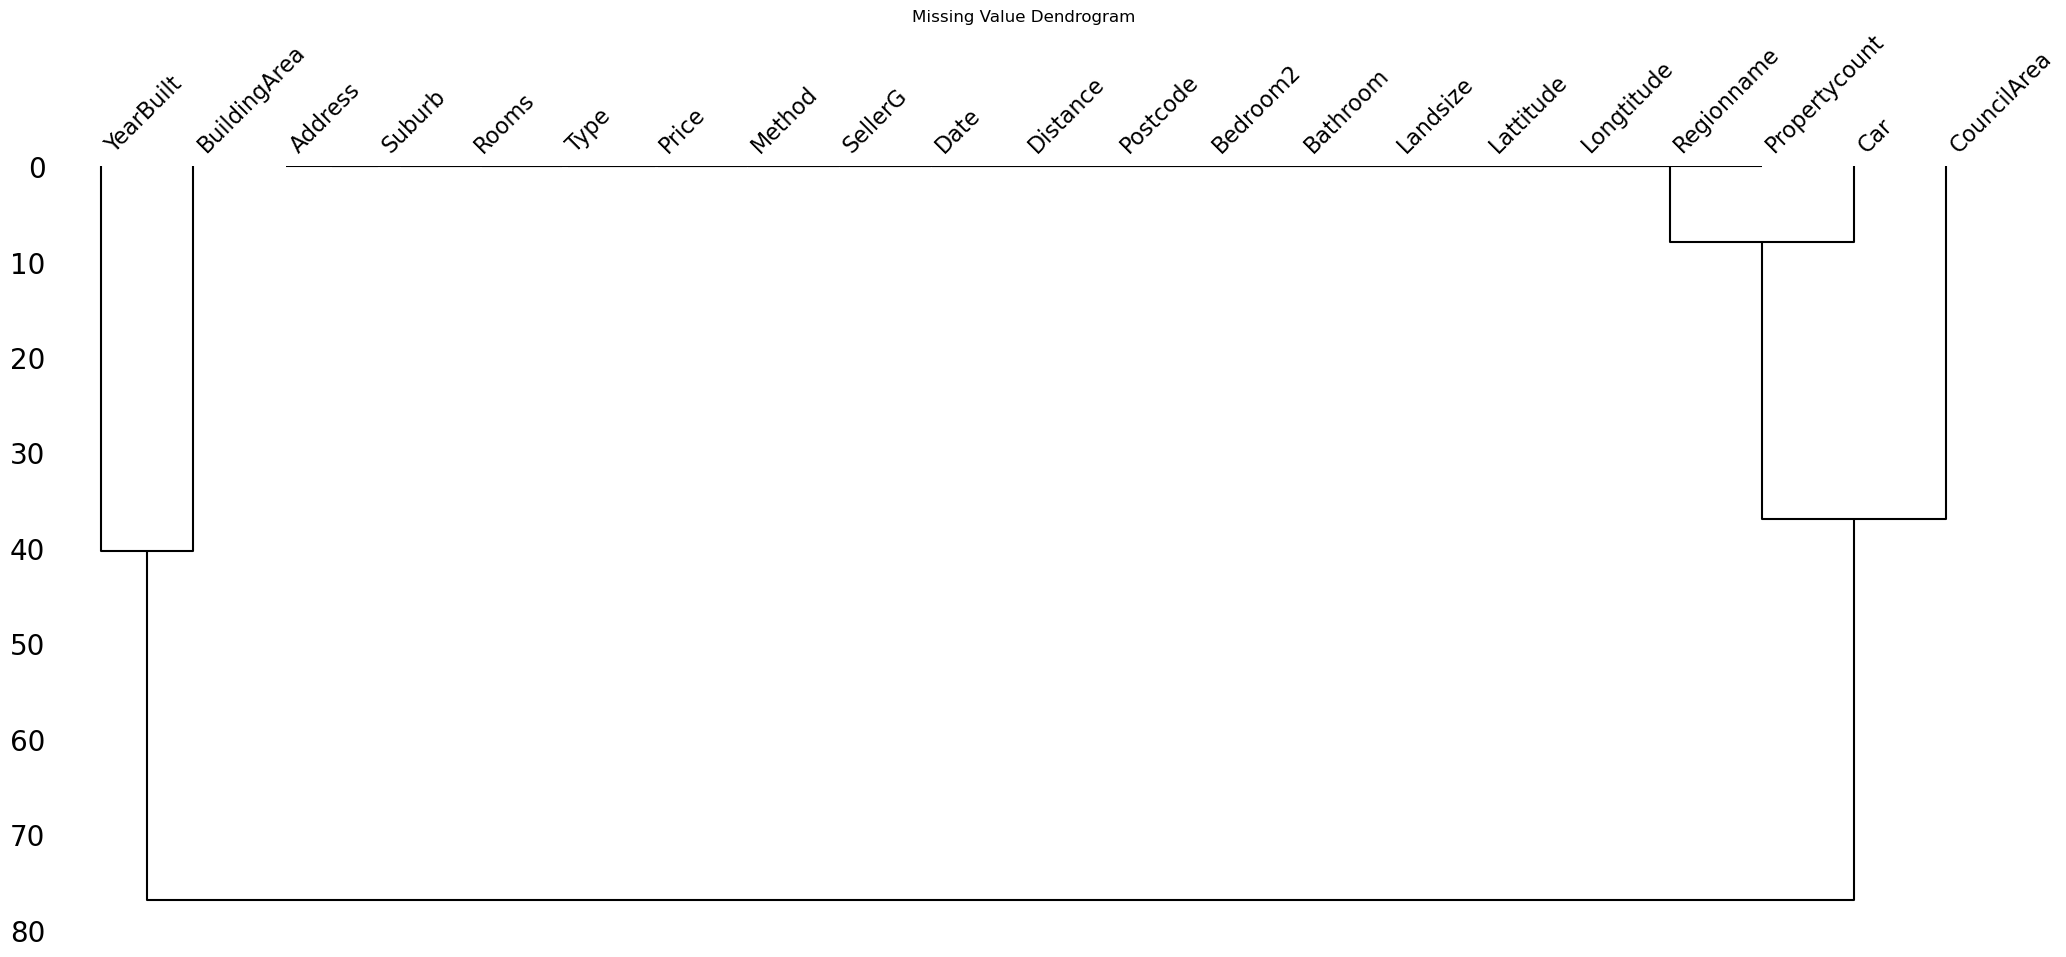

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


# Visualize missing values using a matrix plot
msno.matrix(data)
plt.title("Missing Value Matrix")
plt.show()

# Bar plot of missing values
msno.bar(data)
plt.title("Missing Values by Column")
plt.show()

# Dendrogram to visualize correlation between missing values
msno.dendrogram(data)
plt.title("Missing Value Dendrogram")
plt.show()

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("housing.csv")

data.tail()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0
13579,Yarraville,6 Agnes St,4,h,1285000.0,SP,Village,26/08/2017,6.3,3013.0,...,1.0,1.0,362.0,112.0,1920.0,NaN,-37.81188,144.88449,Western Metropolitan,6543.0


In [12]:
# Assuming 'housing_data' is already loaded and contains the 'Latitude' and 'Longitude' columns.
housing_data = pd.read_csv("housing.csv")

# Count the number of unique groups based on exact same 'Latitude' and 'Longitude'
unique_location_groups = housing_data.groupby(['Lattitude', 'Longtitude']).size()

# Calculate the number of groups with more than one entry
groups_with_duplicates = unique_location_groups[unique_location_groups > 1].count()

# Displaying the results
unique_groups_count = unique_location_groups.count()
groups_with_duplicates, unique_groups_count


(383, 13097)

In [14]:
# Step 1: Fill Missing YearBuilt and CouncilArea Using Same Location (Direct Match)
# Group by Latitude and Longitude
housing_data['YearBuilt'] = housing_data.groupby(['Lattitude', 'Longtitude'])['YearBuilt'].transform(lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x)
housing_data['CouncilArea'] = housing_data.groupby(['Lattitude', 'Longtitude'])['CouncilArea'].transform(lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x)


# Check remaining missing values
missing_summary = housing_data.isna().sum()
print(missing_summary)



Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5236
CouncilArea      1360
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64


In [18]:
# Count the number of unique suburbs in the dataset
unique_suburb_count = housing_data['Suburb'].nunique()
unique_suburb_count



314

In [20]:
# Check if each 'Suburb' is associated with only one unique 'CouncilArea'
suburb_council_counts = housing_data.groupby('Suburb')['CouncilArea'].nunique()

# Find suburbs with more than one unique 'CouncilArea'
suburbs_with_multiple_council_areas = suburb_council_counts[suburb_council_counts > 1]

# Display the results
suburbs_with_multiple_council_areas


Suburb
Alphington        2
Brighton East     2
Brooklyn          2
Bundoora          3
Burwood           2
Cheltenham        2
Coburg North      2
Eltham North      2
Elwood            2
Fairfield         2
Fawkner           2
Fitzroy North     2
Flemington        2
Glen Iris         2
Greensborough     2
Hampton           2
Hampton East      2
Highett           2
Hillside          2
Keilor East       2
Kensington        2
Mont Albert       2
Oakleigh South    2
Port Melbourne    2
Preston           2
South Yarra       2
Southbank         2
Surrey Hills      2
Windsor           2
Name: CouncilArea, dtype: int64

In [22]:
# Step 1: Identify suburbs associated with more than one unique CouncilArea
suburb_council_counts = housing_data.groupby('Suburb')['CouncilArea'].nunique()

# Filter out suburbs associated with more than one CouncilArea
unique_suburbs = suburb_council_counts[suburb_council_counts == 1].index

# Step 2: Define a function to fill missing CouncilArea using unique suburbs
def fill_with_unique_suburb(row, data):
    if pd.isna(row['CouncilArea']):
        # Check if the suburb is in the list of unique suburbs
        if row['Suburb'] in unique_suburbs:
            # Get the mode CouncilArea for the unique suburb
            council_area = data[data['Suburb'] == row['Suburb']]['CouncilArea'].mode()
            if not council_area.empty:
                return council_area.iloc[0]  # Use the most frequent value
    return row['CouncilArea']


In [24]:
# Apply the function directly to the main dataset to fill missing CouncilArea
housing_data['CouncilArea'] = housing_data.apply(
    lambda row: fill_with_unique_suburb(row, housing_data), axis=1
)

# Check the remaining missing values in CouncilArea after applying the function
remaining_missing_council_area_main = housing_data['CouncilArea'].isna().sum()

remaining_missing_council_area_main


226

In [26]:
# Define a function to fill missing values for YearBuilt and CouncilArea using nearby data 
def fill_with_nearby(row, data, column, lat_threshold=0.001, lon_threshold=0.001):
    if pd.isna(row[column]):
        nearby = data[
            (abs(data['Lattitude'] - row['Lattitude']) <= lat_threshold) &
            (abs(data['Longtitude'] - row['Longtitude']) <= lon_threshold) &
            data[column].notna()
        ]
        if not nearby.empty:
            return nearby[column].mode().iloc[0]  # Use most frequent value
    return row[column]



In [28]:
# Apply the function to fill missing CouncilArea on the copied dataset
housing_data['CouncilArea'] = housing_data.apply(
    lambda row: fill_with_nearby(row, housing_data, 'CouncilArea'), axis=1
)

# Check the remaining missing values in CouncilArea
missing_council_area = housing_data['CouncilArea'].isna().sum()

missing_council_area


106

In [30]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

# Encode CouncilArea as integers for KNN
label_encoder = LabelEncoder()
housing_data['CouncilArea_encoded'] = housing_data['CouncilArea'].astype(str)
housing_data['CouncilArea_encoded'] = label_encoder.fit_transform(housing_data['CouncilArea_encoded'])

# Select features for KNN
features = ['Lattitude', 'Longtitude', 'Suburb_encoded']
housing_data['Suburb_encoded'] = label_encoder.fit_transform(housing_data['Suburb'])

# Create KNN Imputer
knn_imputer = KNNImputer(n_neighbors=5)

# Apply KNN to fill CouncilArea_encoded
housing_data[['Lattitude', 'Longtitude', 'Suburb_encoded', 'CouncilArea_encoded']] = knn_imputer.fit_transform(
    housing_data[['Lattitude', 'Longtitude', 'Suburb_encoded', 'CouncilArea_encoded']]
)

# Decode CouncilArea
housing_data['CouncilArea'] = label_encoder.inverse_transform(housing_data['CouncilArea_encoded'].round().astype(int))

# Drop the encoded columns if needed
housing_data.drop(columns=['CouncilArea_encoded', 'Suburb_encoded'], inplace=True)

# Check remaining missing CouncilArea
remaining_missing_council_area_knn = housing_data['CouncilArea'].isna().sum()
print("Remaining missing CouncilArea after KNN:", remaining_missing_council_area_knn)


Remaining missing CouncilArea after KNN: 0


In [32]:
housing_data['CouncilArea'].isna().sum()

0

In [34]:
# Define a function to fill missing values for YearBuilt using nearby data
def fill_with_nearby_yearbuilt(row, data, column='YearBuilt', lat_threshold=0.0001, lon_threshold=0.0001):
    if pd.isna(row[column]):
        nearby = data[
            (abs(data['Lattitude'] - row['Lattitude']) <= lat_threshold) &
            (abs(data['Longtitude'] - row['Longtitude']) <= lon_threshold) &
            data[column].notna()
        ]
        if not nearby.empty:
            return nearby[column].mode().iloc[0]  # Use the most frequent value
    return row[column]



In [36]:
# Apply the function to fill missing YearBuilt on the dataset
housing_data['YearBuilt'] = housing_data.apply(
    lambda row: fill_with_nearby_yearbuilt(row, housing_data), axis=1
)

# Check the remaining missing values in YearBuilt
missing_yearbuilt = housing_data['YearBuilt'].isna().sum()

missing_yearbuilt


5151

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Step 1: Create a validation dataset
validation_data = housing_data.copy()
known_values = validation_data[validation_data['YearBuilt'].notna()]
test_data = known_values.sample(frac=0.2, random_state=42)  # Use 20% of known values as test
validation_data.loc[test_data.index, 'YearBuilt'] = np.nan  # Set test values to NaN

# Step 2: Apply the mode-based imputation
validation_data['YearBuilt'] = validation_data.apply(
    lambda row: fill_with_nearby_yearbuilt(row, validation_data), axis=1
)

# Step 3: Compare imputed values with true values
true_values = test_data['YearBuilt']
imputed_values = validation_data.loc[test_data.index, 'YearBuilt']  # Correct indexing

# Filter out rows with NaN in imputed values
valid_indices = imputed_values.notna()
true_values_filtered = true_values[valid_indices]
imputed_values_filtered = imputed_values[valid_indices]

# Calculate MAE and RMSE
mae = mean_absolute_error(true_values_filtered, imputed_values_filtered)
rmse = np.sqrt(mean_squared_error(true_values_filtered, imputed_values_filtered))

# Print results
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Square Error (RMSE):", rmse)



Mean Absolute Error (MAE): 5.662921348314606
Root Mean Square Error (RMSE): 21.36283657468862


In [40]:
# Total rows in each CouncilArea
total_by_council = housing_data['CouncilArea'].value_counts()

# Missing YearBuilt rows in each CouncilArea
missing_by_council = housing_data[housing_data['YearBuilt'].isna()]['CouncilArea'].value_counts()

# Combine the total and missing counts into a single DataFrame for comparison
council_summary = pd.DataFrame({
    'TotalRows': total_by_council,
    'MissingYearBuilt': missing_by_council
}).fillna(0)  # Fill NaN with 0 for councils without missing values

# Display the summary
print(council_summary)


                    TotalRows  MissingYearBuilt
CouncilArea                                    
Abbotsford                627               265
Aberfeldie                541               227
Airport West             1257               482
Albanvale                 476               227
Albert Park                 8                 2
Albion                     46                19
Alphington               1001               414
Altona                     79                29
Altona Meadows            899               328
Altona North               64                36
Ardeer                    466               194
Armadale                  244                81
Ascot Vale                266               104
Ashburton                 110                46
Ashwood                    10                 4
Aspendale                 358               157
Aspendale Gardens         733               231
Attwood                   115                48
Avondale Heights          488           

In [42]:
housing_data['CouncilArea'].nunique()


34

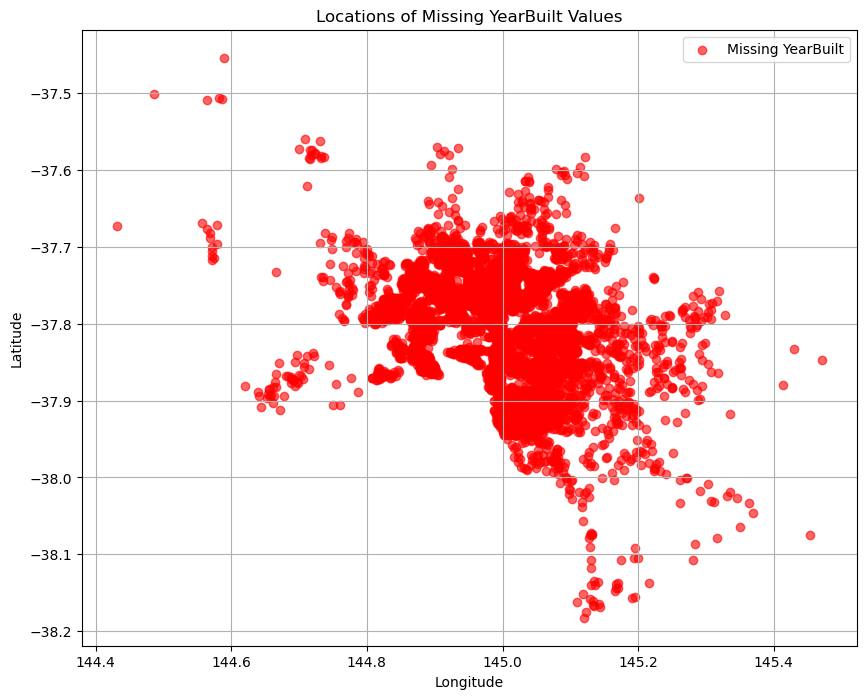

In [44]:
# Re-import required libraries
import pandas as pd
import matplotlib.pyplot as plt

# Reload the dataset

# Filter for rows with missing YearBuilt values
missing_year_built_data = housing_data[housing_data['YearBuilt'].isna()]

# Create a scatter plot for the locations of missing YearBuilt values
plt.figure(figsize=(10, 8))
plt.scatter(
    missing_year_built_data['Longtitude'],
    missing_year_built_data['Lattitude'],
    c='red',
    alpha=0.6,
    label='Missing YearBuilt'
)
plt.title('Locations of Missing YearBuilt Values')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid()
plt.show()


In [195]:
housing_data.to_csv('beforeoutlier_housing_data.csv', index=False)

In [46]:
# Load the dataset
data = pd.read_csv("beforeoutlier_housing_data.csv")

# Select relevant columns
df = data

# Check for missing values
print(df.isnull().sum())

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5151
CouncilArea         0
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
CouncilCount        0
dtype: int64


In [48]:
import pandas as pd
import matplotlib.pyplot as plt

housing_data = pd.read_csv('beforeoutlier_housing_data.csv')

C:\Users\utaka\AppData\Local\Temp\ipykernel_9040\4215153420.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(filter_by_iqr_within_groups, column='BuildingArea')


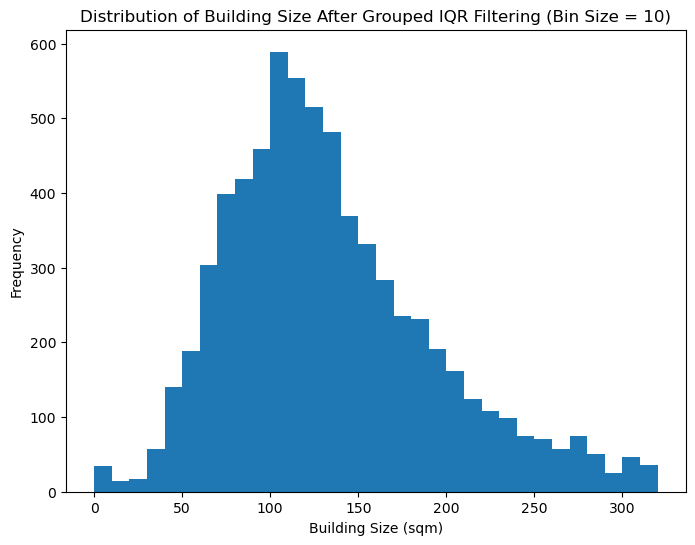

C:\Users\utaka\AppData\Local\Temp\ipykernel_9040\4215153420.py:46: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(filter_landsize_by_iqr, column='Landsize')


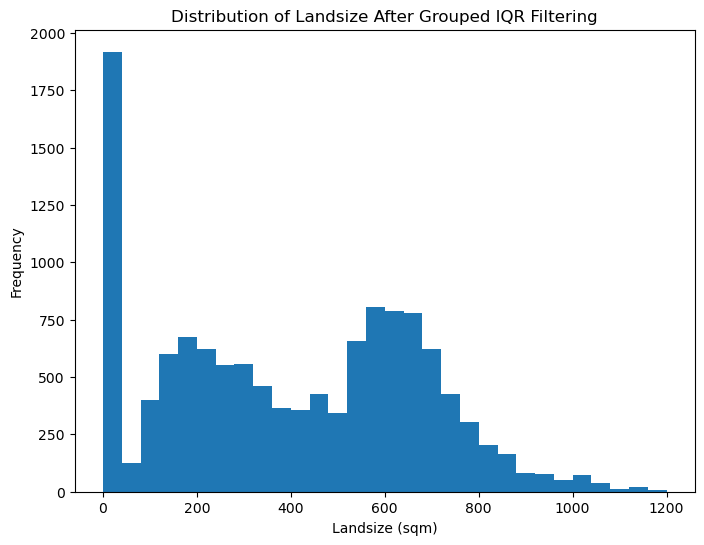

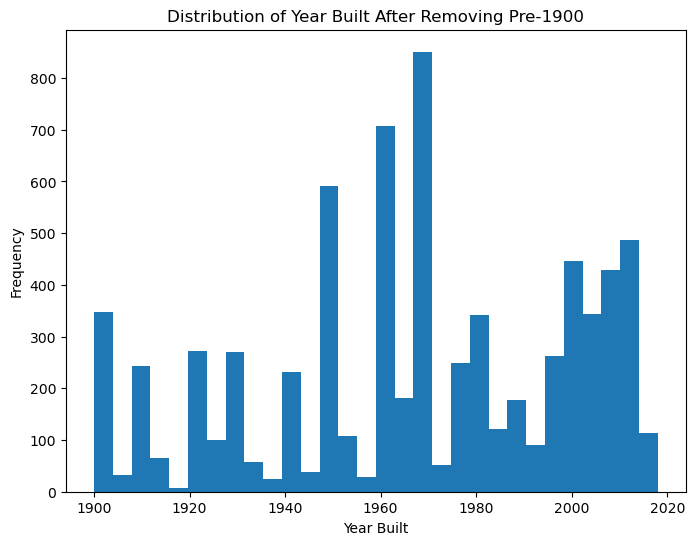

Filtered dataset saved to 'filtered_housing_data.csv'


In [50]:
# Define a function to apply IQR filtering within each group
def filter_by_iqr_within_groups(group, column):
    Q1 = group[column].quantile(0.25)
    Q3 = group[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Retain rows with NaN values and those within the IQR bounds
    return group[
        (group[column].isna()) |
        ((group[column] >= lower_bound) & (group[column] <= upper_bound))
    ]

# Apply the IQR filtering function to each 'Type' group for BuildingArea
buildingarea_filtered_data_grouped = (
    housing_data.groupby('Type', group_keys=False)
    .apply(filter_by_iqr_within_groups, column='BuildingArea')
)

# Plot the distribution of BuildingArea after filtering
plt.figure(figsize=(8, 6))
buildingarea_filtered_data_grouped['BuildingArea'].dropna().plot(
    kind='hist',
    bins=range(0, int(buildingarea_filtered_data_grouped['BuildingArea'].max()) + 10, 10),
    title="Distribution of Building Size After Grouped IQR Filtering (Bin Size = 10)"
)
plt.xlabel("Building Size (sqm)")
plt.ylabel("Frequency")
plt.show()

# Apply the IQR filtering function to each 'Type' group for Landsize
def filter_landsize_by_iqr(group, column):
    Q1 = group[column].quantile(0.25)
    Q3 = group[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Retain rows with NaN values and those within the IQR bounds
    return group[
        (group[column].isna()) |
        ((group[column] >= lower_bound) & (group[column] <= upper_bound))
    ]

landsized_filtered_data_grouped = (
    buildingarea_filtered_data_grouped.groupby('Type', group_keys=False)
    .apply(filter_landsize_by_iqr, column='Landsize')
)

# Plot the distribution of Landsize after grouped IQR filtering
plt.figure(figsize=(8, 6))
landsized_filtered_data_grouped['Landsize'].dropna().plot(
    kind='hist',
    bins=30,
    title="Distribution of Landsize After Grouped IQR Filtering"
)
plt.xlabel("Landsize (sqm)")
plt.ylabel("Frequency")
plt.show()

# Filter out rows where YearBuilt is before 1900, retaining NaN values
yearbuilt_filtered_direct = landsized_filtered_data_grouped[
    (landsized_filtered_data_grouped['YearBuilt'].isna()) | (landsized_filtered_data_grouped['YearBuilt'] >= 1900)
]

# Plot the distribution of YearBuilt after filtering rows before 1900
plt.figure(figsize=(8, 6))
yearbuilt_filtered_direct['YearBuilt'].dropna().plot(
    kind='hist',
    bins=30,
    title="Distribution of Year Built After Removing Pre-1900"
)
plt.xlabel("Year Built")
plt.ylabel("Frequency")
plt.show()

# Save the final filtered dataset to a new file
final_filtered_data = yearbuilt_filtered_direct
final_filtered_data.to_csv('filtered_housing_data.csv', index=False)

print("Filtered dataset saved to 'filtered_housing_data.csv'")

In [52]:
print(final_filtered_data.isnull().sum())

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                44
Landsize            0
BuildingArea     6037
YearBuilt        4885
CouncilArea         0
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
CouncilCount        0
dtype: int64


In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import pandas as pd
from sklearn.impute import KNNImputer



def knn_impute_by_group(df, target_columns, group_columns, feature_columns, n_neighbors=1):
    """
    Performs KNN imputation for target columns grouped by specific categories.

    Args:
        df (pd.DataFrame): The input dataset.
        target_columns (list): List of columns to impute.
        group_columns (list): List of columns to group by.
        feature_columns (list): List of features to use for KNN imputation.
        n_neighbors (int): Number of neighbors to use in KNN.

    Returns:
        pd.DataFrame: The dataset with imputed values.
    """
    grouped = df.groupby(group_columns)
    result_dfs = []

    for group_key, group_data in grouped:
        # Select numeric features for KNN
        group_numeric = group_data[feature_columns].select_dtypes(include=['number'])
        original_index = group_numeric.index

        # Remove columns with all NaN values
        non_empty_columns = group_numeric.columns[group_numeric.notna().any()]
        group_numeric = group_numeric[non_empty_columns]

        if len(group_numeric) > 1 and any(col in group_numeric.columns for col in target_columns):
            # Perform KNN imputation
            knn_imputer = KNNImputer(n_neighbors=n_neighbors)
            imputed_values = knn_imputer.fit_transform(group_numeric)

            # Align the imputed data back to the group
            imputed_df = pd.DataFrame(imputed_values, columns=group_numeric.columns, index=original_index)

            # Ensure integer-like columns are rounded and cast to Int64
            for col in target_columns:
                if col in imputed_df.columns and df[col].dtype.name in ['Int64', 'int64']:
                    imputed_df[col] = imputed_df[col].round().astype('Int64')

            # Update the group with imputed values
            group_data.update(imputed_df)

        result_dfs.append(group_data)

    # Combine all groups back into a single DataFrame
    result_df = pd.concat(result_dfs).reset_index(drop=True)
    return result_df


# Define columns for imputation and features
target_cols = ['YearBuilt','Bathroom','Distance','Lattitude','Longtitude','Propertycount','Landsize']
group_cols = ['Type','Regionname']
features = target_cols  # Use the same as the target columns for imputation

housing_data2=pd.read_csv('filtered_housing_data.csv')
# Perform KNN imputation
housing_data_imputed = knn_impute_by_group(housing_data2, target_cols, group_cols, features)



In [60]:
housing_data_imputed

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,CouncilCount
0,Bellfield,20 Davidson St,3,h,773000.0,S,Nelson,6/08/2016,9.5,3081.0,...,2.0,626.0,93.0,1955.0,Abbotsford,-37.75200,145.03670,Eastern Metropolitan,790.0,627
1,Bellfield,40 Plunkett St,3,h,885000.0,S,Nelson,12/11/2016,9.5,3081.0,...,1.0,666.0,109.0,1960.0,Abbotsford,-37.75090,145.04230,Eastern Metropolitan,790.0,627
2,Bellfield,8 Erica Ct,3,h,770000.0,S,Haughton,16/04/2016,9.5,3081.0,...,4.0,762.0,109.0,1960.0,Abbotsford,-37.75290,145.04060,Eastern Metropolitan,790.0,627
3,Bellfield,353 Waterdale Rd,2,h,855000.0,S,Barry,18/03/2017,9.5,3081.0,...,0.0,693.0,109.0,1960.0,Abbotsford,-37.75340,145.04540,Eastern Metropolitan,790.0,627
4,Bellfield,305 Bell St,3,h,645000.0,SP,Nelson,22/05/2016,9.5,3081.0,...,2.0,631.0,109.0,1950.0,Abbotsford,-37.75060,145.04300,Eastern Metropolitan,790.0,627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12154,Richmond,712/8 Howard St,2,u,927000.0,S,Biggin,29/07/2017,2.4,3121.0,...,2.0,0.0,85.0,2000.0,Berwick,-37.83305,144.99745,Northern Metropolitan,14949.0,682
12155,Richmond,3/30 Tanner St,2,u,575500.0,S,hockingstuart,29/07/2017,2.4,3121.0,...,1.0,0.0,60.0,1970.0,Berwick,-37.82328,144.99203,Northern Metropolitan,14949.0,682
12156,Greensborough,2/5 McDowell St,2,u,540000.0,S,Darren,26/08/2017,16.1,3088.0,...,1.0,208.0,NaN,1995.0,Blackburn,-37.70791,145.09575,Northern Metropolitan,8524.0,106
12157,Highett,2/4 Turner Rd,2,u,680500.0,S,Ray,26/08/2017,16.0,3190.0,...,1.0,158.0,NaN,2000.0,Blackburn,-37.95147,145.04904,Southern Metropolitan,4794.0,106


In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import pandas as pd
from sklearn.impute import KNNImputer



def knn_impute_by_group(df, target_columns, group_columns, feature_columns, n_neighbors=1):
    """
    Performs KNN imputation for target columns grouped by specific categories.

    Args:
        df (pd.DataFrame): The input dataset.
        target_columns (list): List of columns to impute.
        group_columns (list): List of columns to group by.
        feature_columns (list): List of features to use for KNN imputation.
        n_neighbors (int): Number of neighbors to use in KNN.

    Returns:
        pd.DataFrame: The dataset with imputed values.
    """
    grouped = df.groupby(group_columns)
    result_dfs = []

    for group_key, group_data in grouped:
        # Select numeric features for KNN
        group_numeric = group_data[feature_columns].select_dtypes(include=['number'])
        original_index = group_numeric.index

        # Remove columns with all NaN values
        non_empty_columns = group_numeric.columns[group_numeric.notna().any()]
        group_numeric = group_numeric[non_empty_columns]

        if len(group_numeric) > 1 and any(col in group_numeric.columns for col in target_columns):
            # Perform KNN imputation
            knn_imputer = KNNImputer(n_neighbors=n_neighbors)
            imputed_values = knn_imputer.fit_transform(group_numeric)

            # Align the imputed data back to the group
            imputed_df = pd.DataFrame(imputed_values, columns=group_numeric.columns, index=original_index)

            # Ensure integer-like columns are rounded and cast to Int64
            for col in target_columns:
                if col in imputed_df.columns and df[col].dtype.name in ['Int64', 'int64']:
                    imputed_df[col] = imputed_df[col].round().astype('Int64')

            # Update the group with imputed values
            group_data.update(imputed_df)

        result_dfs.append(group_data)

    # Combine all groups back into a single DataFrame
    result_df = pd.concat(result_dfs).reset_index(drop=True)
    return result_df


# Define columns for imputation and features
target_cols = ['BuildingArea','Car','Rooms','Bathroom','Bedroom2','Distance','Propertycount','Landsize']
group_cols = ['Type','CouncilArea','Suburb']
features = target_cols  # Use the same as the target columns for imputation

# Perform KNN imputation
housing_data_imputed = knn_impute_by_group(housing_data_imputed, target_cols, group_cols, features)



In [52]:
housing_data_imputed

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,CouncilCount
0,Bellfield,20 Davidson St,3,h,773000.0,S,Nelson,6/08/2016,9.5,3081.0,...,2.0,626.0,93.0,1955.0,Abbotsford,-37.75200,145.03670,Eastern Metropolitan,790.0,627
1,Bellfield,40 Plunkett St,3,h,885000.0,S,Nelson,12/11/2016,9.5,3081.0,...,1.0,666.0,109.0,1960.0,Abbotsford,-37.75090,145.04230,Eastern Metropolitan,790.0,627
2,Bellfield,8 Erica Ct,3,h,770000.0,S,Haughton,16/04/2016,9.5,3081.0,...,4.0,762.0,109.0,1960.0,Abbotsford,-37.75290,145.04060,Eastern Metropolitan,790.0,627
3,Bellfield,353 Waterdale Rd,2,h,855000.0,S,Barry,18/03/2017,9.5,3081.0,...,0.0,693.0,109.0,1960.0,Abbotsford,-37.75340,145.04540,Eastern Metropolitan,790.0,627
4,Bellfield,305 Bell St,3,h,645000.0,SP,Nelson,22/05/2016,9.5,3081.0,...,2.0,631.0,109.0,1950.0,Abbotsford,-37.75060,145.04300,Eastern Metropolitan,790.0,627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12154,Richmond,712/8 Howard St,2,u,927000.0,S,Biggin,29/07/2017,2.4,3121.0,...,2.0,0.0,85.0,2000.0,Berwick,-37.83305,144.99745,Northern Metropolitan,14949.0,682
12155,Richmond,3/30 Tanner St,2,u,575500.0,S,hockingstuart,29/07/2017,2.4,3121.0,...,1.0,0.0,60.0,1970.0,Berwick,-37.82328,144.99203,Northern Metropolitan,14949.0,682
12156,Greensborough,2/5 McDowell St,2,u,540000.0,S,Darren,26/08/2017,16.1,3088.0,...,1.0,208.0,NaN,1995.0,Blackburn,-37.70791,145.09575,Northern Metropolitan,8524.0,106
12157,Highett,2/4 Turner Rd,2,u,680500.0,S,Ray,26/08/2017,16.0,3190.0,...,1.0,158.0,NaN,2000.0,Blackburn,-37.95147,145.04904,Southern Metropolitan,4794.0,106


In [64]:
nan_counts = housing_data_imputed.isna().sum()

# Display the counts
print(nan_counts)

Suburb             0
Address            0
Rooms              0
Type               0
Price              0
Method             0
SellerG            0
Date               0
Distance           0
Postcode           0
Bedroom2           0
Bathroom           0
Car                0
Landsize           0
BuildingArea     125
YearBuilt          0
CouncilArea        0
Lattitude          0
Longtitude         0
Regionname         0
Propertycount      0
CouncilCount       0
dtype: int64


In [66]:
def knn_impute_by_council_and_type(df, target_columns, feature_columns, n_neighbors=5):
    """
    Performs KNN imputation for target columns grouped by 'CouncilArea' and 'Type'.

    Args:
        df (pd.DataFrame): The input dataset.
        target_columns (list): List of columns to impute.
        feature_columns (list): List of features to use for KNN imputation.
        n_neighbors (int): Number of neighbors to use in KNN.

    Returns:
        pd.DataFrame: The dataset with imputed values.
    """
    grouped = df.groupby(['Type', 'CouncilArea'])
    result_dfs = []

    for group_key, group_data in grouped:
        # Select numeric features for KNN
        group_numeric = group_data[feature_columns].select_dtypes(include=['number'])
        original_index = group_numeric.index

        # Remove columns with all NaN values
        non_empty_columns = group_numeric.columns[group_numeric.notna().any()]
        group_numeric = group_numeric[non_empty_columns]

        if len(group_numeric) > 1 and any(col in group_numeric.columns for col in target_columns):
            # Perform KNN imputation
            knn_imputer = KNNImputer(n_neighbors=n_neighbors)
            imputed_values = knn_imputer.fit_transform(group_numeric)

            # Align the imputed data back to the group
            imputed_df = pd.DataFrame(imputed_values, columns=group_numeric.columns, index=original_index)

            # Ensure integer-like columns are rounded and cast to Int64
            for col in target_columns:
                if col in imputed_df.columns and df[col].dtype.name in ['Int64', 'int64']:
                    imputed_df[col] = imputed_df[col].round().astype('Int64')

            # Update the group with imputed values
            group_data.update(imputed_df)

        result_dfs.append(group_data)

    # Combine all groups back into a single DataFrame
    result_df = pd.concat(result_dfs).reset_index(drop=True)
    return result_df


# Define columns for imputation and features
target_cols =['BuildingArea','Car','Rooms','Bathroom','Bedroom2','Distance','Propertycount']
features = target_cols  # Use the same columns for both target and features

# Perform KNN imputation grouped by 'CouncilArea' and 'Type'
housing_data_imputed_council_type = knn_impute_by_council_and_type(housing_data_imputed, target_cols, features)
housing_data_imputed_council_type


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,CouncilCount
0,Bellfield,20 Davidson St,3,h,773000.0,S,Nelson,6/08/2016,9.5,3081.0,...,2.0,626.0,93.0,1955.0,Abbotsford,-37.75200,145.03670,Eastern Metropolitan,790.0,627
1,Bellfield,40 Plunkett St,3,h,885000.0,S,Nelson,12/11/2016,9.5,3081.0,...,1.0,666.0,109.0,1960.0,Abbotsford,-37.75090,145.04230,Eastern Metropolitan,790.0,627
2,Bellfield,8 Erica Ct,3,h,770000.0,S,Haughton,16/04/2016,9.5,3081.0,...,4.0,762.0,109.0,1960.0,Abbotsford,-37.75290,145.04060,Eastern Metropolitan,790.0,627
3,Bellfield,353 Waterdale Rd,2,h,855000.0,S,Barry,18/03/2017,9.5,3081.0,...,0.0,693.0,109.0,1960.0,Abbotsford,-37.75340,145.04540,Eastern Metropolitan,790.0,627
4,Bellfield,305 Bell St,3,h,645000.0,SP,Nelson,22/05/2016,9.5,3081.0,...,2.0,631.0,109.0,1950.0,Abbotsford,-37.75060,145.04300,Eastern Metropolitan,790.0,627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12154,Richmond,712/8 Howard St,2,u,927000.0,S,Biggin,29/07/2017,2.4,3121.0,...,2.0,0.0,85.0,2000.0,Berwick,-37.83305,144.99745,Northern Metropolitan,14949.0,682
12155,Richmond,3/30 Tanner St,2,u,575500.0,S,hockingstuart,29/07/2017,2.4,3121.0,...,1.0,0.0,60.0,1970.0,Berwick,-37.82328,144.99203,Northern Metropolitan,14949.0,682
12156,Greensborough,2/5 McDowell St,2,u,540000.0,S,Darren,26/08/2017,16.1,3088.0,...,1.0,208.0,NaN,1995.0,Blackburn,-37.70791,145.09575,Northern Metropolitan,8524.0,106
12157,Highett,2/4 Turner Rd,2,u,680500.0,S,Ray,26/08/2017,16.0,3190.0,...,1.0,158.0,NaN,2000.0,Blackburn,-37.95147,145.04904,Southern Metropolitan,4794.0,106


In [68]:
nan_counts = housing_data_imputed_council_type.isna().sum()

# Display the counts
print(nan_counts)

Suburb            0
Address           0
Rooms             0
Type              0
Price             0
Method            0
SellerG           0
Date              0
Distance          0
Postcode          0
Bedroom2          0
Bathroom          0
Car               0
Landsize          0
BuildingArea     12
YearBuilt         0
CouncilArea       0
Lattitude         0
Longtitude        0
Regionname        0
Propertycount     0
CouncilCount      0
dtype: int64


In [72]:
housing_data_imputed_council_type.dropna(inplace=True)

housing_data_imputed_council_type



,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,CouncilCount
0,Bellfield,20 Davidson St,3,h,773000.0,S,Nelson,6/08/2016,9.5,3081.0,...,2.0,626.0,93.0,1955.0,Abbotsford,-37.75200,145.03670,Eastern Metropolitan,790.0,627
1,Bellfield,40 Plunkett St,3,h,885000.0,S,Nelson,12/11/2016,9.5,3081.0,...,1.0,666.0,109.0,1960.0,Abbotsford,-37.75090,145.04230,Eastern Metropolitan,790.0,627
2,Bellfield,8 Erica Ct,3,h,770000.0,S,Haughton,16/04/2016,9.5,3081.0,...,4.0,762.0,109.0,1960.0,Abbotsford,-37.75290,145.04060,Eastern Metropolitan,790.0,627
3,Bellfield,353 Waterdale Rd,2,h,855000.0,S,Barry,18/03/2017,9.5,3081.0,...,0.0,693.0,109.0,1960.0,Abbotsford,-37.75340,145.04540,Eastern Metropolitan,790.0,627
4,Bellfield,305 Bell St,3,h,645000.0,SP,Nelson,22/05/2016,9.5,3081.0,...,2.0,631.0,109.0,1950.0,Abbotsford,-37.75060,145.04300,Eastern Metropolitan,790.0,627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12151,Richmond,306/45 York St,2,u,685000.0,SP,Collins,22/07/2017,2.4,3121.0,...,1.0,0.0,77.0,2011.0,Berwick,-37.81300,144.99303,Northern Metropolitan,14949.0,682
12152,Richmond,16/297 Church St,2,u,666000.0,S,hockingstuart,29/07/2017,2.4,3121.0,...,1.0,0.0,60.0,1970.0,Berwick,-37.82110,144.99896,Northern Metropolitan,14949.0,682
12153,Richmond,5/33 Davison St,1,u,330000.0,VB,Marshall,29/07/2017,2.4,3121.0,...,1.0,0.0,43.7,1970.0,Berwick,-37.81317,145.00834,Northern Metropolitan,14949.0,682
12154,Richmond,712/8 Howard St,2,u,927000.0,S,Biggin,29/07/2017,2.4,3121.0,...,2.0,0.0,85.0,2000.0,Berwick,-37.83305,144.99745,Northern Metropolitan,14949.0,682


In [73]:
housing_data_imputed_council_type.to_csv('housing_data_imputed.csv', index=False)


In [74]:
# Create a copy of the subset to avoid SettingWithCopyWarning
housing_data_imputed_council_type = housing_data_imputed_council_type[housing_data_imputed_council_type['BuildingArea'] != 0].copy()

# Calculate 'Price_per_sqm'
housing_data_imputed_council_type['Price_per_sqm'] = housing_data_imputed_council_type.apply(
    lambda row: row['Price'] / row['BuildingArea'] if row['Type'] == 'u' else row['Price'] / (row['BuildingArea'] + row['Landsize']),
    axis=1
)

housing_data_imputed_council_type

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,CouncilCount,Price_per_sqm
0,Bellfield,20 Davidson St,3,h,773000.0,S,Nelson,6/08/2016,9.5,3081.0,...,626.0,93.0,1955.0,Abbotsford,-37.75200,145.03670,Eastern Metropolitan,790.0,627,1075.104312
1,Bellfield,40 Plunkett St,3,h,885000.0,S,Nelson,12/11/2016,9.5,3081.0,...,666.0,109.0,1960.0,Abbotsford,-37.75090,145.04230,Eastern Metropolitan,790.0,627,1141.935484
2,Bellfield,8 Erica Ct,3,h,770000.0,S,Haughton,16/04/2016,9.5,3081.0,...,762.0,109.0,1960.0,Abbotsford,-37.75290,145.04060,Eastern Metropolitan,790.0,627,884.041332
3,Bellfield,353 Waterdale Rd,2,h,855000.0,S,Barry,18/03/2017,9.5,3081.0,...,693.0,109.0,1960.0,Abbotsford,-37.75340,145.04540,Eastern Metropolitan,790.0,627,1066.084788
4,Bellfield,305 Bell St,3,h,645000.0,SP,Nelson,22/05/2016,9.5,3081.0,...,631.0,109.0,1950.0,Abbotsford,-37.75060,145.04300,Eastern Metropolitan,790.0,627,871.621622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12151,Richmond,306/45 York St,2,u,685000.0,SP,Collins,22/07/2017,2.4,3121.0,...,0.0,77.0,2011.0,Berwick,-37.81300,144.99303,Northern Metropolitan,14949.0,682,8896.103896
12152,Richmond,16/297 Church St,2,u,666000.0,S,hockingstuart,29/07/2017,2.4,3121.0,...,0.0,60.0,1970.0,Berwick,-37.82110,144.99896,Northern Metropolitan,14949.0,682,11100.000000
12153,Richmond,5/33 Davison St,1,u,330000.0,VB,Marshall,29/07/2017,2.4,3121.0,...,0.0,43.7,1970.0,Berwick,-37.81317,145.00834,Northern Metropolitan,14949.0,682,7551.487414
12154,Richmond,712/8 Howard St,2,u,927000.0,S,Biggin,29/07/2017,2.4,3121.0,...,0.0,85.0,2000.0,Berwick,-37.83305,144.99745,Northern Metropolitan,14949.0,682,10905.882353


In [ ]:
# Save and display the modified dataset
housing_data_imputed_council_type.to_csv('housing_data_with_price_per_sqm.csv', index=False)
housing_data_imputed_council_type


In [76]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

def dkw_test_imputed_nonparametric(original, imputed, confidence_level=0.95):
    """
    Applies the DKW inequality using a non-parametric ECDF for the true CDF.

    Args:
        original (array-like): Original (non-missing) values.
        imputed (array-like): Imputed values.
        confidence_level (float): Desired confidence level (default: 0.95).

    Returns:
        dict: Results containing epsilon, violations, and validity.
    """
    n_original = len(original)
    n_imputed = len(imputed)

    # Compute ECDF for original and imputed values
    ecdf_original = np.sort(original)
    ecdf_imputed = np.sort(imputed)

    empirical_cdf_original = np.arange(1, n_original + 1) / n_original
    empirical_cdf_imputed = np.arange(1, n_imputed + 1) / n_imputed

    # Use ECDF from original data as the "true" CDF
    ecdf_fn = ECDF(original)
    true_cdf_original = ecdf_fn(ecdf_original)
    true_cdf_imputed = ecdf_fn(ecdf_imputed)

    # Compute epsilon based on confidence level
    delta = 1 - confidence_level
    epsilon = np.sqrt(np.log(2 / delta) / (2 * n_original))

    # Check DKW bound for imputed data
    deviations = np.abs(empirical_cdf_imputed - true_cdf_imputed)
    violations = deviations > epsilon
    valid = not np.any(violations)

    # Plot comparison
    plt.figure(figsize=(10, 6))
    plt.plot(ecdf_original, empirical_cdf_original, label="Original ECDF", color="blue")
    plt.plot(ecdf_imputed, empirical_cdf_imputed, label="Imputed ECDF", color="orange")
    plt.fill_between(ecdf_original, true_cdf_original - epsilon, true_cdf_original + epsilon,
                     color="gray", alpha=0.2, label="DKW Bound")
    plt.title("DKW Test: Original vs Imputed ECDF (Non-Parametric)")
    plt.xlabel("Data Values")
    plt.ylabel("CDF")
    plt.legend()
    plt.grid()
    plt.show()

    return {
        "epsilon": epsilon,
        "violations": np.sum(violations),
        "valid": valid,
    }


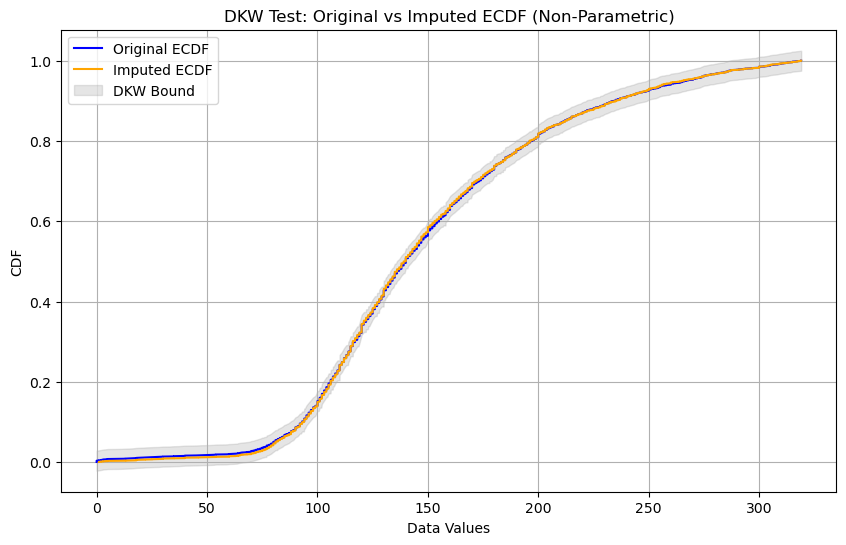

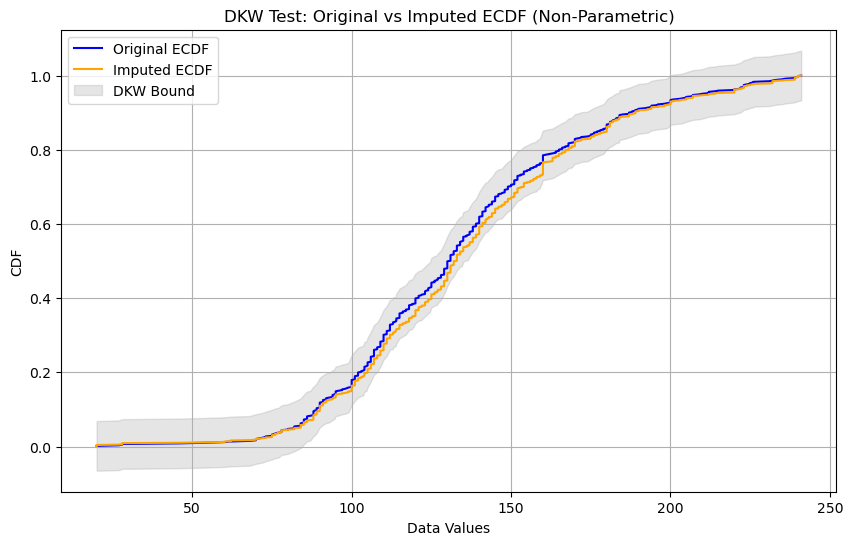

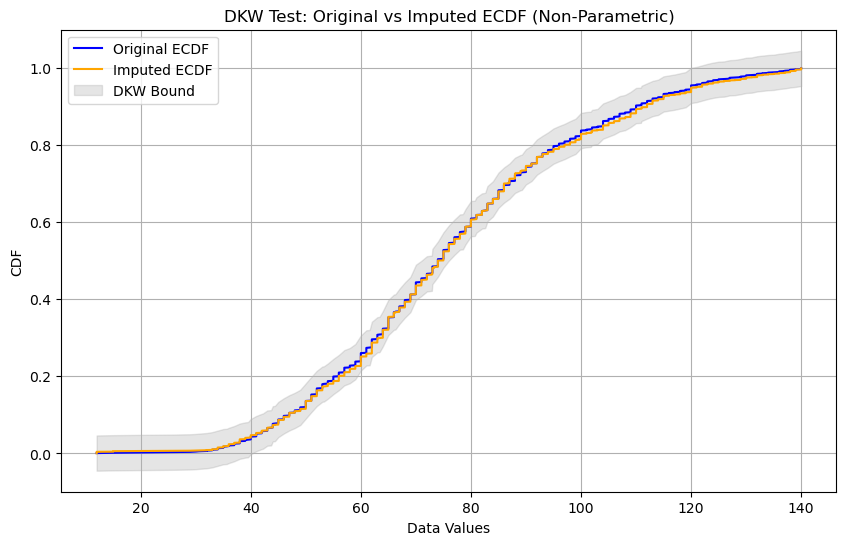

Type: h
Epsilon: 0.0249
Violations: 0
DKW Validity: Passed

Type: t
Epsilon: 0.0670
Violations: 0
DKW Validity: Passed

Type: u
Epsilon: 0.0458
Violations: 0
DKW Validity: Passed



In [78]:
def dkw_test_by_type(df_original, df_imputed, column, confidence_level=0.99):
    """
    Computes the DKW test by BuildingArea and compares the original and imputed distributions.

    Args:
        df_original (pd.DataFrame): Original dataset with missing values.
        df_imputed (pd.DataFrame): Dataset with imputed values.
        column (str): The column to evaluate.
        confidence_level (float): Desired confidence level (default: 0.95).

    Returns:
        dict: A dictionary with BuildingArea-wise DKW test results.
    """
    results = {}
    grouped_original = df_original.groupby('Type')
    grouped_imputed = df_imputed.groupby('Type')

    for type_, group_original in grouped_original:
        if type_ in grouped_imputed.groups:
            group_imputed = grouped_imputed.get_group(type_)

            # Align indices for slicing
            original_index = group_original.index
            imputed_index = group_imputed.index.intersection(original_index)

            # Extract original and imputed values for the column
            original_values = group_original.loc[original_index, column].dropna().astype(float)
            imputed_values = group_imputed.loc[imputed_index, column].dropna().astype(float)

            if len(original_values) > 0 and len(imputed_values) > 0:
                # Apply DKW test for the group
                dkw_result = dkw_test_imputed_nonparametric(original_values, imputed_values, confidence_level)
                results[type_] = dkw_result

    return results



building_dkw_results_type = dkw_test_by_type(housing_data2, housing_data_imputed_council_type, 'BuildingArea')


for type_, result in building_dkw_results_type.items():
    print(f"Type: {type_}")
    print(f"Epsilon: {result['epsilon']:.4f}")
    print(f"Violations: {result['violations']}")
    print(f"DKW Validity: {'Passed' if result['valid'] else 'Failed'}\n")

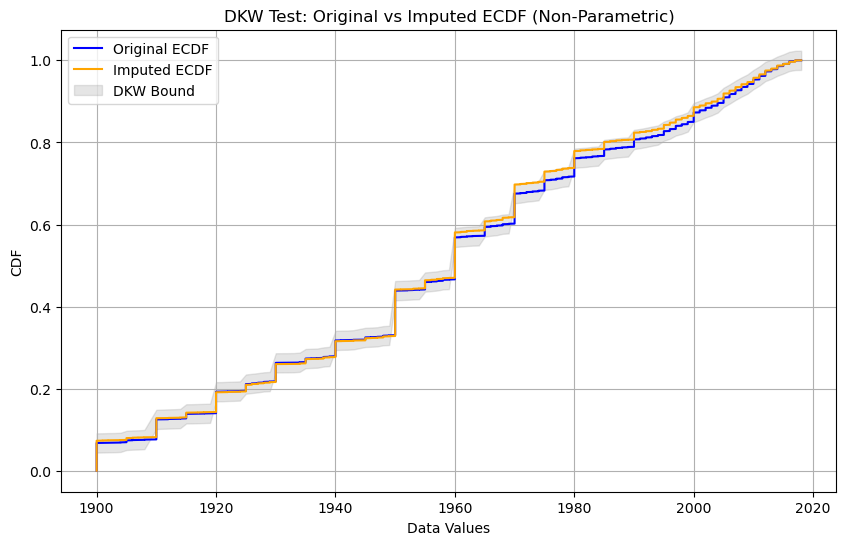

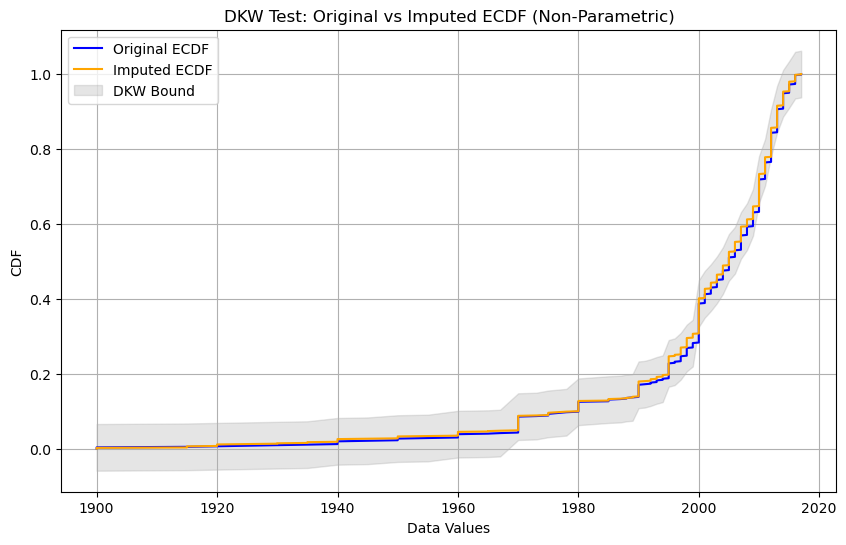

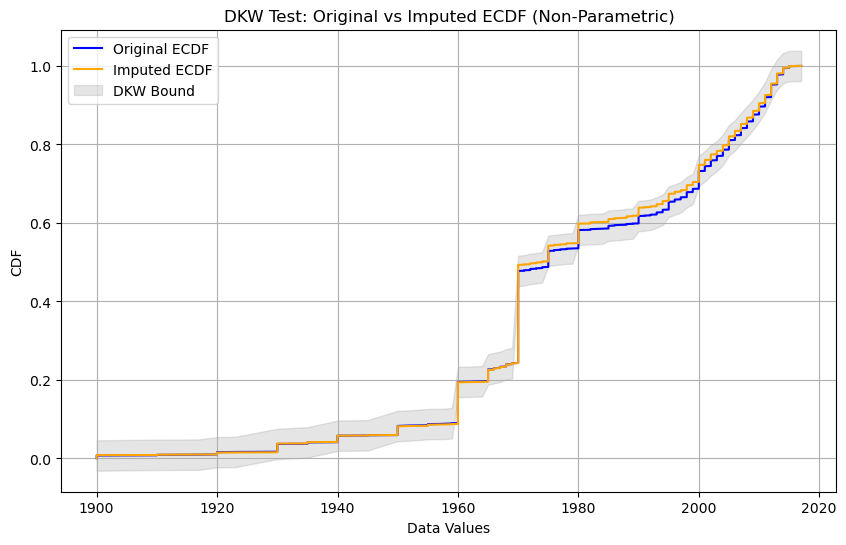

Type: h
Epsilon: 0.0234
Violations: 2860
DKW Validity: Failed

Type: t
Epsilon: 0.0623
Violations: 29
DKW Validity: Failed

Type: u
Epsilon: 0.0387
Violations: 645
DKW Validity: Failed



In [80]:
def dkw_test_by_type(df_original, df_imputed, column, confidence_level=0.99):
    """
    Computes the DKW test by CouncilArea and compares the original and imputed distributions.

    Args:
        df_original (pd.DataFrame): Original dataset with missing values.
        df_imputed (pd.DataFrame): Dataset with imputed values.
        column (str): The column to evaluate.
        confidence_level (float): Desired confidence level (default: 0.95).

    Returns:
        dict: A dictionary with Yearbuilt-wise DKW test results.
    """
    results = {}
    grouped_original = df_original.groupby('Type')
    grouped_imputed = df_imputed.groupby('Type')

    for type_, group_original in grouped_original:
        if type_ in grouped_imputed.groups:
            group_imputed = grouped_imputed.get_group(type_)

            # Align indices for slicing
            original_index = group_original.index
            imputed_index = group_imputed.index.intersection(original_index)

            # Extract original and imputed values for the column
            original_values = group_original.loc[original_index, column].dropna().astype(float)
            imputed_values = group_imputed.loc[imputed_index, column].dropna().astype(float)

            if len(original_values) > 0 and len(imputed_values) > 0:
                # Apply DKW test for the group
                dkw_result = dkw_test_imputed_nonparametric(original_values, imputed_values, confidence_level)
                results[type_] = dkw_result

    return results


yearbuilt_dkw_type = dkw_test_by_type(housing_data2, housing_data_imputed_council_type, 'YearBuilt')

for type_, result in yearbuilt_dkw_type.items():
    print(f"Type: {type_}")
    print(f"Epsilon: {result['epsilon']:.4f}")
    print(f"Violations: {result['violations']}")
    print(f"DKW Validity: {'Passed' if result['valid'] else 'Failed'}\n")